<a href="https://colab.research.google.com/github/oweskhan77/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


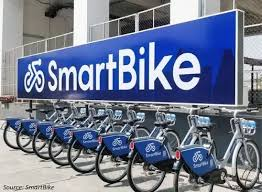

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Defining and Understanding business problem (domain knowledge of business)**

## Rented Bike sharing systems are a means of renting bike where the process of  renting bike and bike return is automated throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on need basis.
## The last couple of years has seen a significant rise in the number of bike share companies popping up across in India also, becuase of :-
* ## Rental bike are Cheaper Than Transit or Car Rental
* ## cost-effective

*   ## It Eliminates the Need for Personal Bike Ownership



* ##  It’s Healthier Than Driving or Riding Transit



 * ## Because rental bike sharing is growing ,so availibility of bike at the right time is really important for companies to serve customer. In this project i have dataset of Seoul city (capital of South Korea) . The dataset contain information like weather condition,holiday,date,number of rented bike count,hours. Based on these data i have to predict bikes count at each hour for the stable supply of rental bikes.
* ## This dataset contain around 8,760 rows of information and each row contain information like weather condition ,holidays or funtioning days ,count of bike required at particular hour on a particular date.
##Using this dataset i have analyze it and also need to creat machine learning model so that i can predict count of bike required at each hour.

*  ## Understanding business problem is really important ,so till now we understand what is the business problem and also what kind of information we have in our dataset and what we have to predict using machine learning model.







In [224]:
#Mounting  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Summary

In [226]:
#load the seol bike data set from drive
df = pd.read_csv('/content/drive/MyDrive/Almabetter/PROJECTS/Bike Sharing Demand Prediction ML Regression/SeoulBikeData.csv',encoding 
                 ='latin')

In [227]:
# we will copy the dataframe to other instance to ensure efficiency if there's a need of change.
df1=df.copy()

In [228]:
# Check first 5 rows of dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [229]:
# Check last 5 rows of dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [230]:
df.shape

(8760, 14)

* Our Datasets has 8760 rows and 14 columns

In [231]:
## Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [232]:
# Another way to get familiar with dataset is checking describe 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [233]:
# Check sum of null values in each columns
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* Our Dataset has no Null Values

In [234]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**Let's convert 'Date' column from object datatype to *datetime* datatype**

In [235]:
df['Date'] = pd.to_datetime(df['Date'])

In [236]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

**Extracting the *date, month & year* from 'Date' column and assigning it to new column respectively**

In [237]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()


In [238]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [239]:
## Let's drop the date column
df = df.drop('Date', axis=1)

In [240]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


# **Exploratory Data Analysis Of The Data Set**

## **Analysation of categorical variables**




#### Yearly

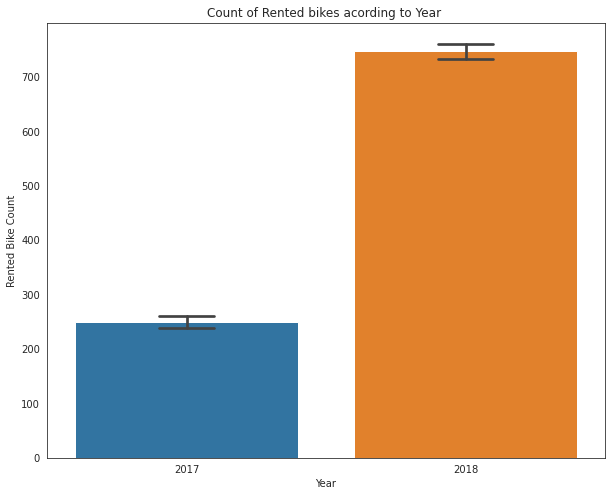

In [241]:
#anlysis of Rented bikes acording to Year 
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=df,x='Year',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Year ')
plt.show()

*  In year 2018 count is increase as compare to 2017 

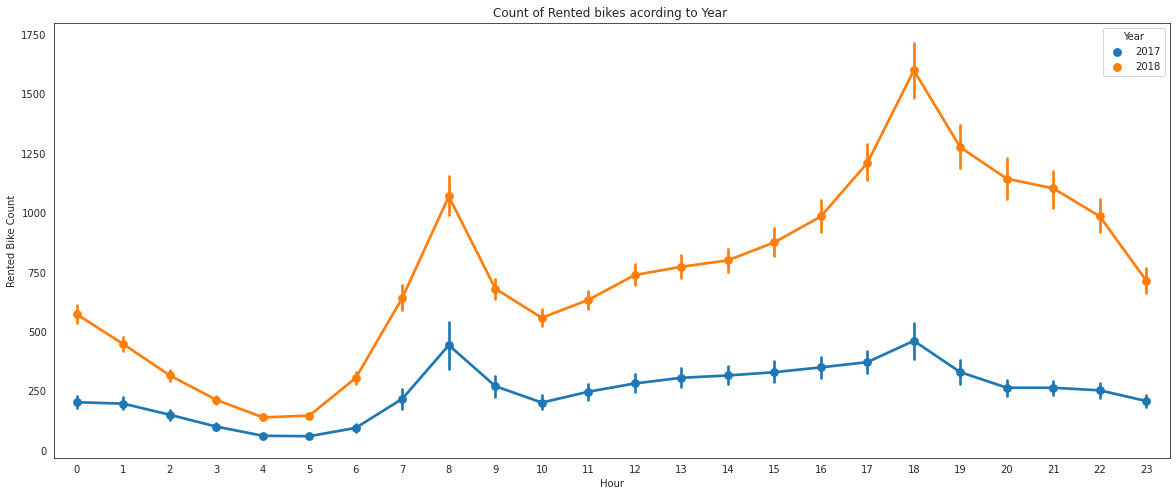

In [242]:
#anlysis of Rented bikes acording to Year
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Year',ax=ax)
ax.set(title='Count of Rented bikes acording to Year ')
plt.show()

####  Month wise analysis

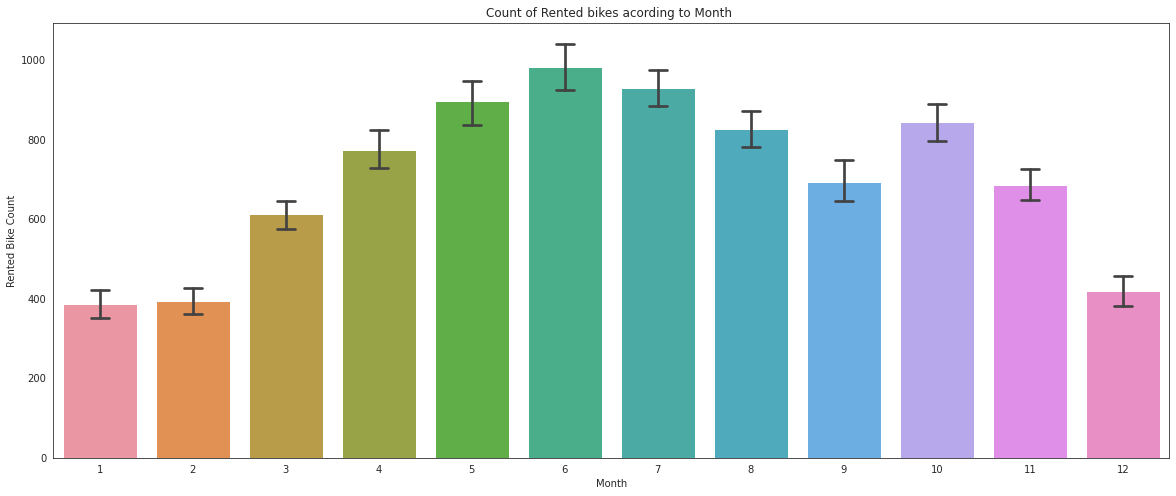

In [243]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.barplot(data=df,x='Month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')
plt.show()




#### Weekdays

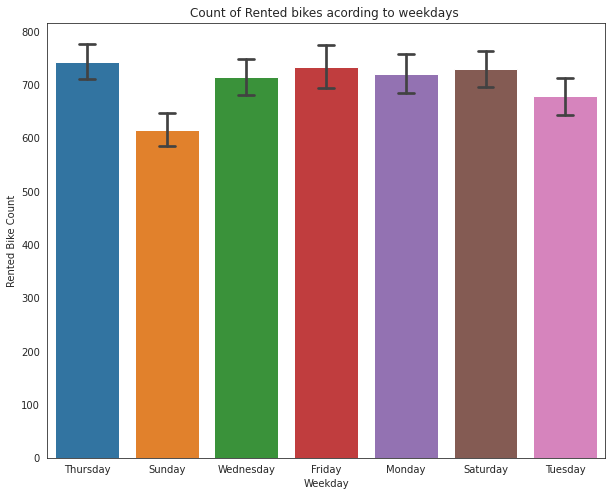

In [244]:
#anlysis of Rented bikes acording to weekdays 
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=df,x='Weekday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays ')
plt.show()

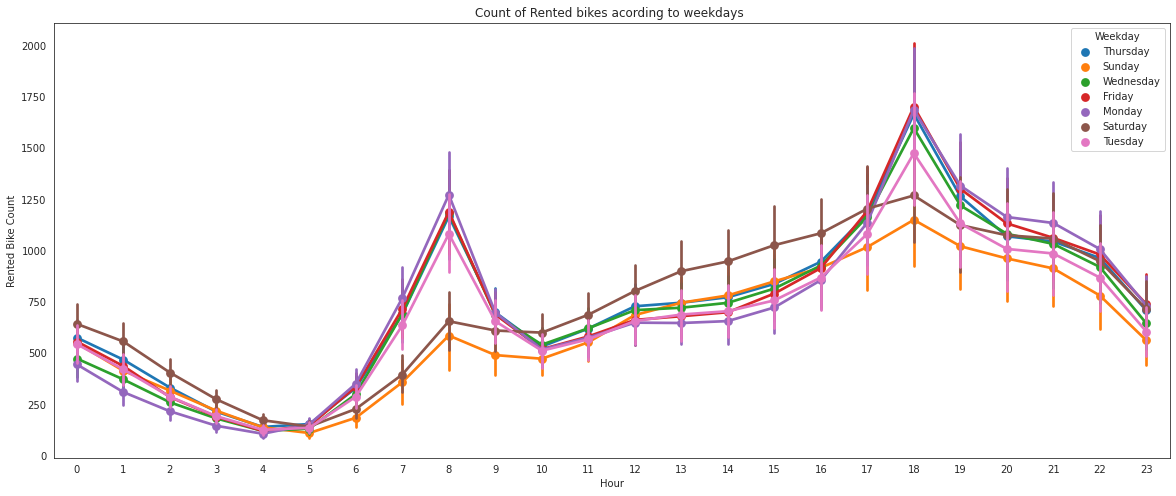

In [245]:
#anlysis of Rented bikes acording to weekdays
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Weekday',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays ')
plt.show()

#### Hour

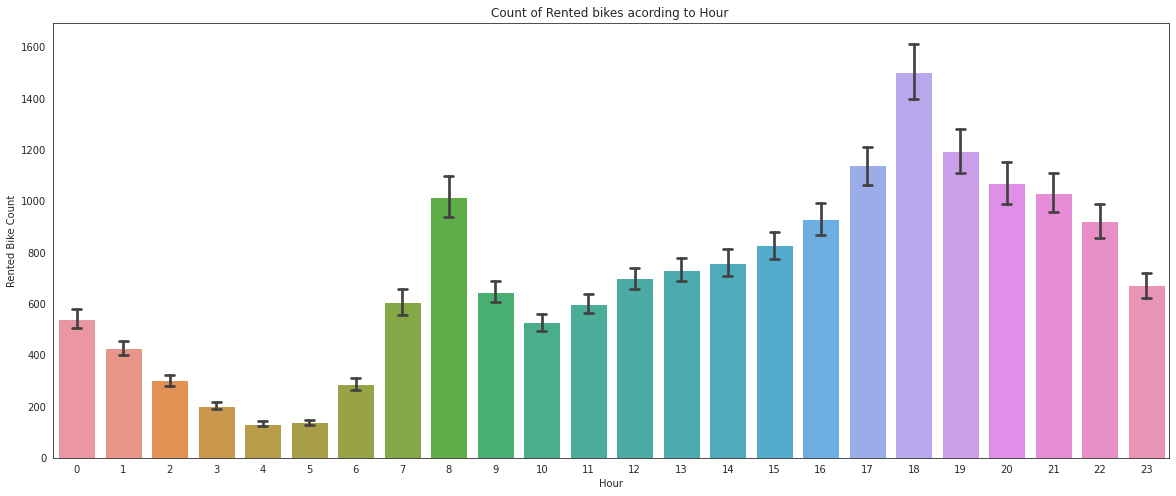

In [246]:
#anlysis of hour
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')
plt.show()

#### Functioning Day

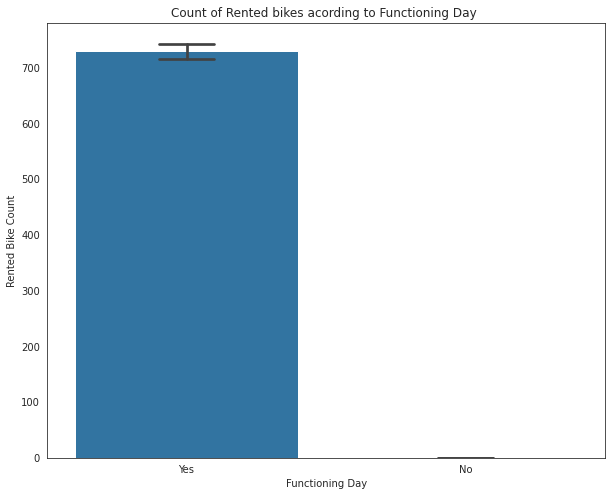

In [247]:
#anlysis of Rented bikes acording to Functioning Day
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')
plt.show()

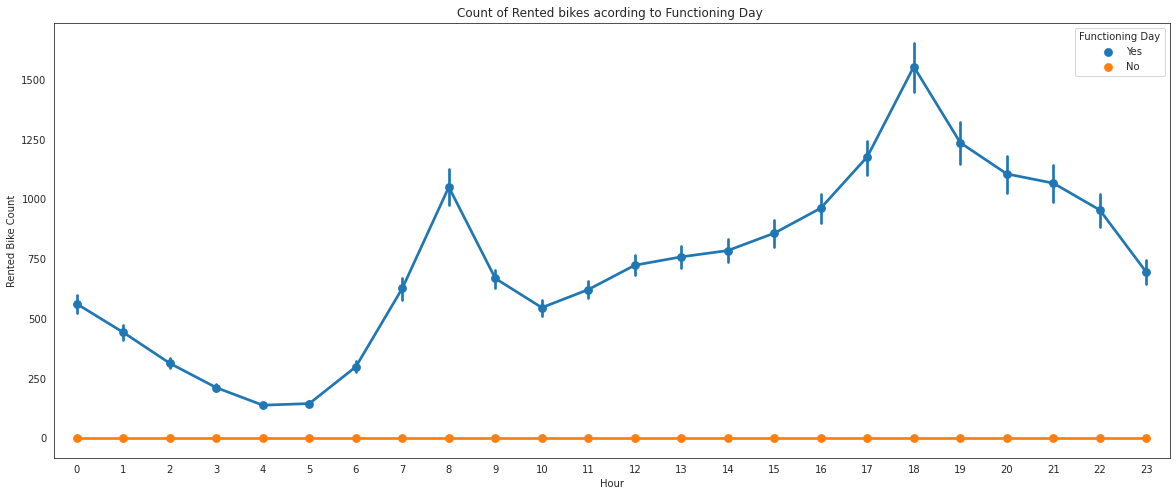

In [248]:
#anlysis of Rented bikes acording to Functioning Day
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')
plt.show()

#### Seasons

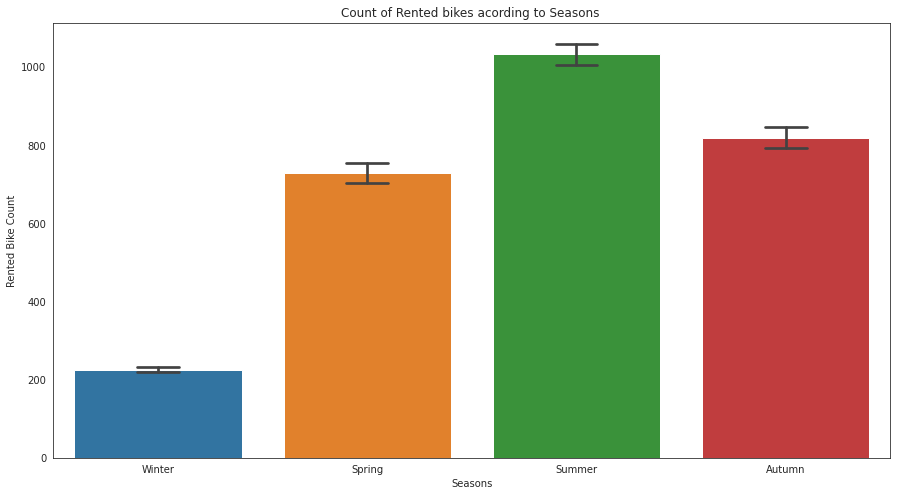

In [249]:
#anlysis of Rented bikes acording to Seasons
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style("white")
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')
plt.show()

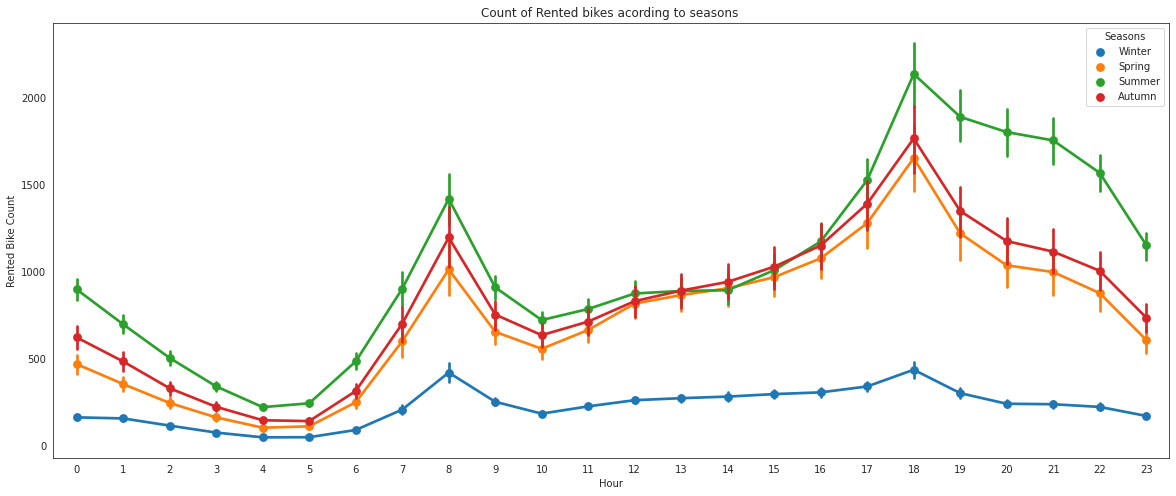

In [250]:
#anlysis of Rented bikes acording to seasons
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')
plt.show()

#### Holiday

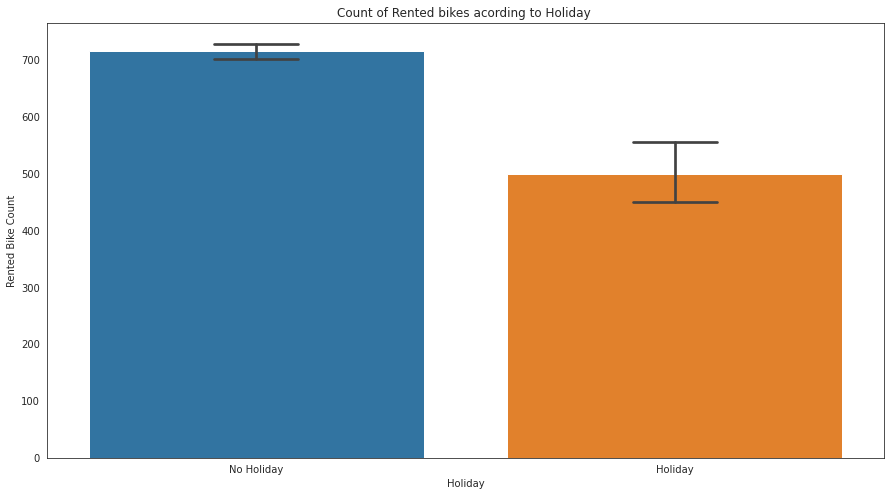

In [251]:
#anlysis of Rented bikes acording to Holiday
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style("white")
sns.barplot(data=df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')
plt.show()

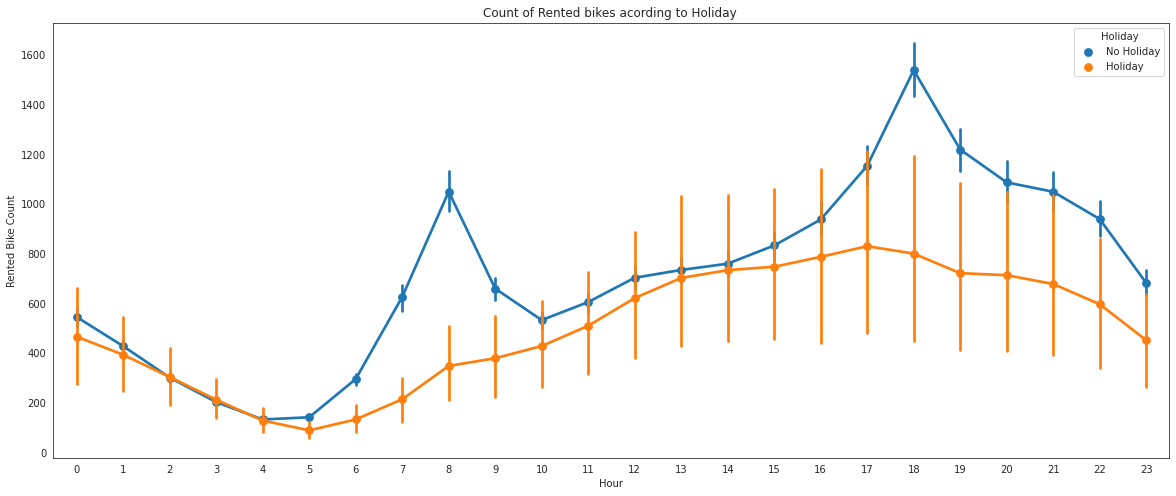

In [252]:
#anlysis of Rented bikes acording to Holiday
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')
plt.show()

#Feature Engineering

In [253]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

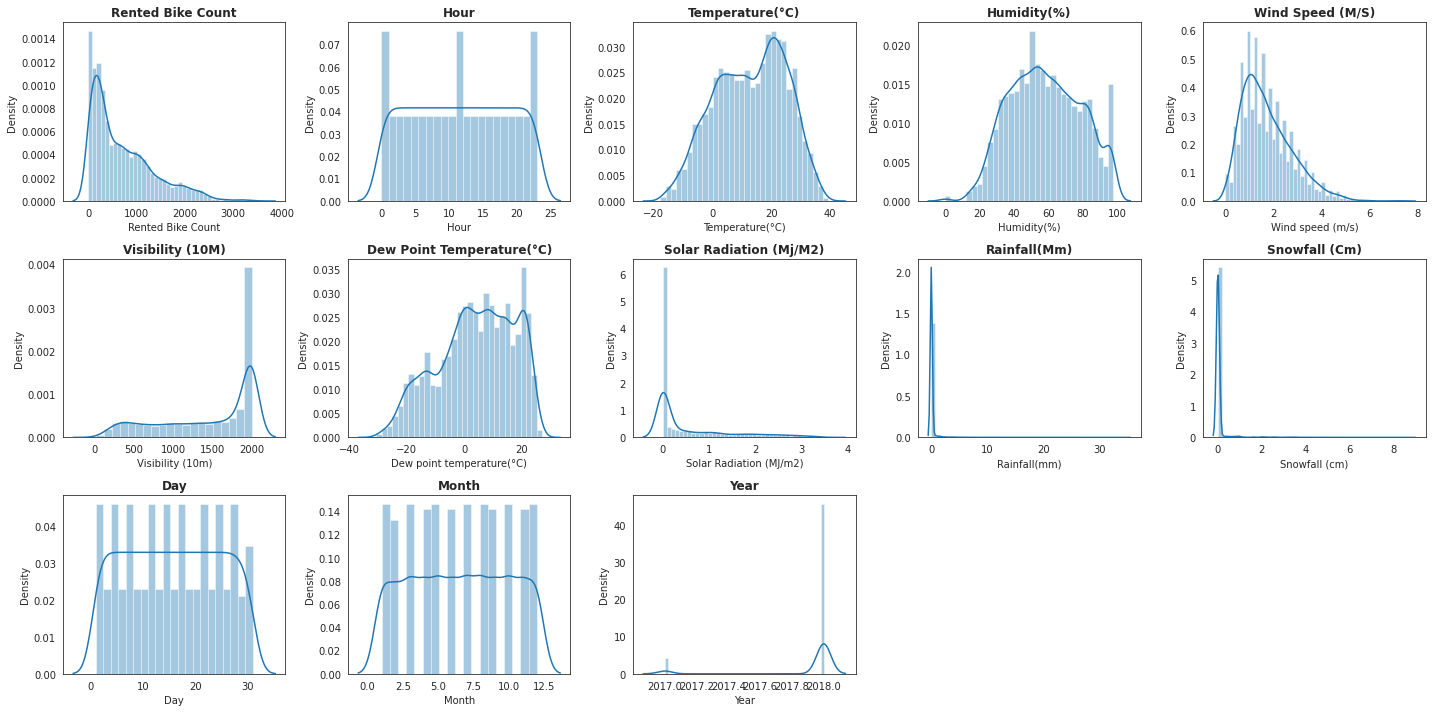

In [254]:
# Visualizing the distribution
plt.figure(figsize=(20,10))
for n, column in enumerate(df.describe().columns):
  plt.subplot(3, 5, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

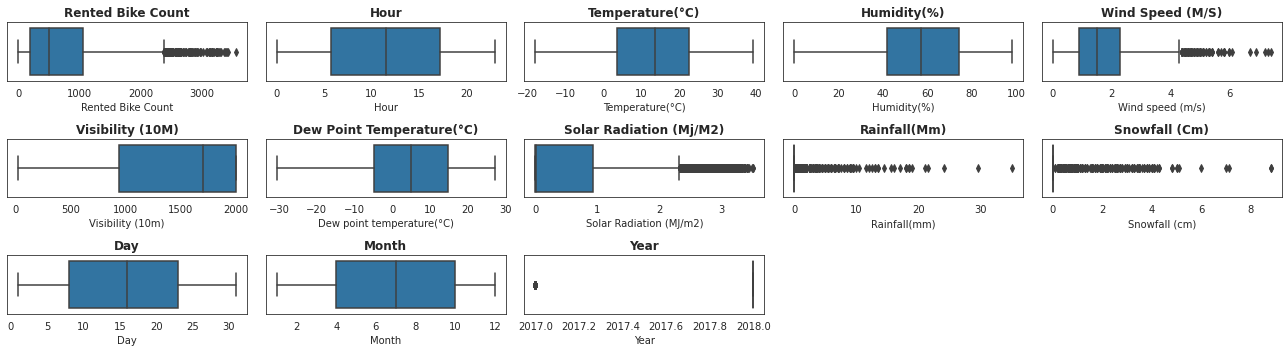

In [255]:
# Visiualizing in boxplot is easyway to find outliers in our dataset
plt.figure(figsize=(18,5))
for n, column in enumerate(df.describe().columns):
  plt.subplot(3, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

### Handling Outliers

In [256]:
# Removing outliers by using IQR method:
q1, q3, median = df['Rented Bike Count'].quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Rented Bike Count'] = np.where(df['Rented Bike Count'] > upper_limit, median, np.where(
                              df['Rented Bike Count'] < lower_limit, median, df['Rented Bike Count']))

# Removing outliers by capping
for col in ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

## Regression plot 

In [257]:
numerical_features=[ 'Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", 9)
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))



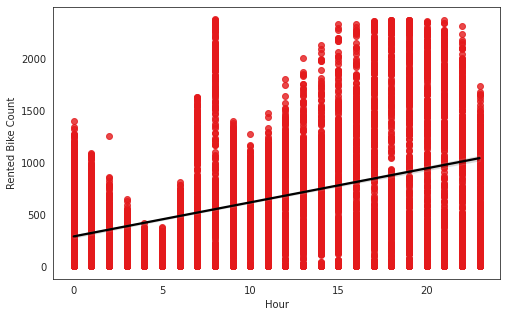

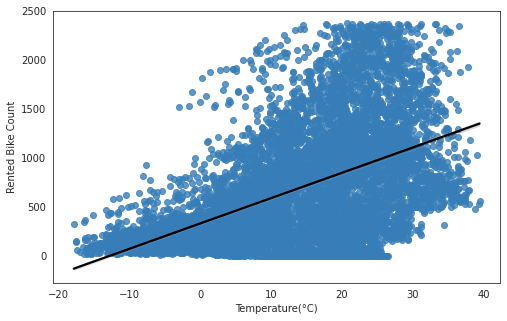

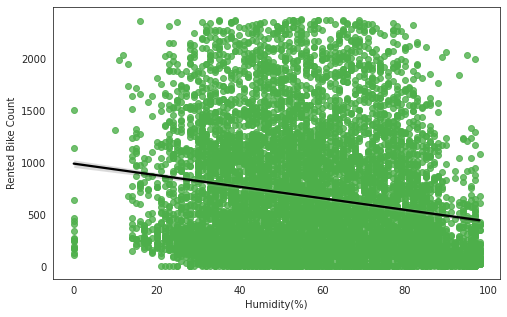

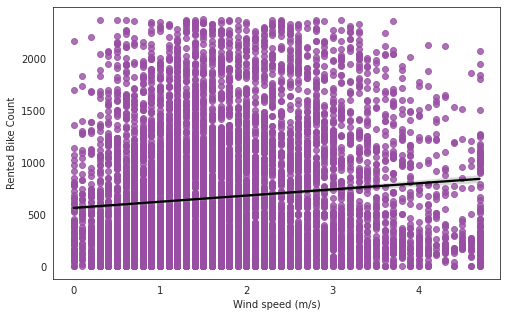

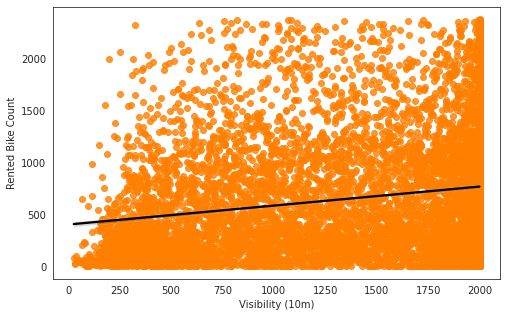

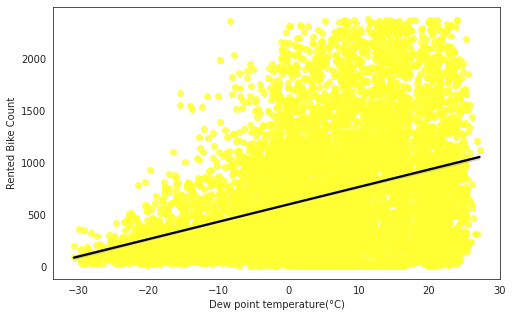

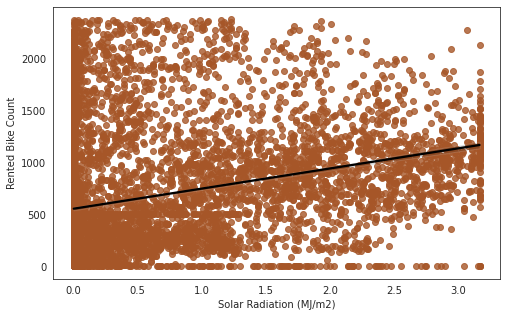

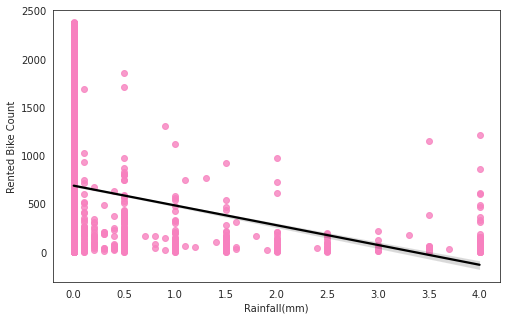

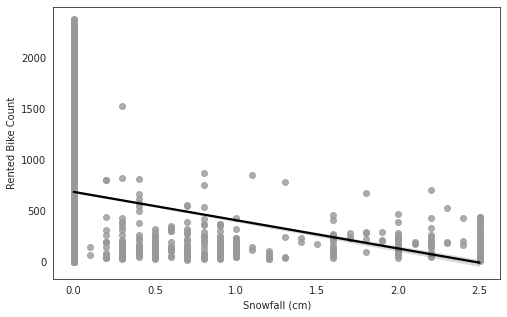

In [258]:
#Reg plots w.r.t different numerical parameters and Rentend Bike Count
plt.rcParams['figure.figsize'] = (8, 5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=df[col], y = df['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "black"})

* 1]We can obsrrve that, with increase in temperature there's increase in rented bike counts.

* 2]However, more number of bikes are rented if there's low humidity from 20% humidity onwards, rented bike counts falls.

* 3]Also higher the windspeed(more than 5 m/s) than higher the number of rented bike counts. 

* 4]Visibility generally don't have much impact but the number of rented bikes are less if there's low visibility. Thus visibility must be more than 500 (10 m) for getting more number of bikes rented.

* 5] Dew point remperature is linearly related to rented bike count as more the dew point temperature, higher the number of bikes rented. 

**Converting Data**

In [259]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,665.023174,584.616052,0.0,191.00,504.25,1020.00,2375.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.720114,1.019646,0.0,0.90,1.50,2.30,4.70
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.567985,0.865253,0.0,0.00,0.01,0.93,3.17
Rainfall(mm),8760.0,0.097260,0.512681,0.0,0.00,0.00,0.00,4.00
Snowfall (cm),8760.0,0.064292,0.335162,0.0,0.00,0.00,0.00,2.50


**From the above summary of the data we can observe that Solar Radiation, Rainfall & Snowfall values starts from 50% or more. Thus, we can converts this features into categorical features as 1 or 0 with condition on certain threshold value**

In [261]:
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].apply(lambda x: 1 if x >= 0.56 else 0)
df['Rainfall(mm)'] = df['Rainfall(mm)'].apply(lambda x: 1 if x > 0.14 else 0)
df['Snowfall (cm)'] = df['Snowfall (cm)'].apply(lambda x: 1 if x > 0.07 else 0)

In [262]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254.0,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204.0,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173.0,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107.0,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78.0,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [263]:
print(df['Holiday'].value_counts())
print('-'*50)
print(df['Functioning Day'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
--------------------------------------------------
Yes    8465
No      295
Name: Functioning Day, dtype: int64


*Let us now change data type of 'Holiday' and 'Functioning Day' from object to int*

In [264]:
df['Holiday'] = df['Holiday'].map({'No Holiday' : 0, 'Holiday' : 1})
df['Functioning Day'] = df['Functioning Day'].map({'No' : 0, 'Yes' : 1})

In [265]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254.0,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
1,204.0,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
2,173.0,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,0,1,12,1,2017,Thursday
3,107.0,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
4,78.0,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,0,1,12,1,2017,Thursday


In [266]:
df[(df['Rented Bike Count'] >= 1) & (df['Functioning Day'] == 0)]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday


*We can observe that no bikes were rented on non functioning day. Thus, it is better to drop all the rows with functioning day as 0*

In [267]:
df = df[df['Functioning Day'] == 1]

In [268]:
df.shape

(8465, 17)

* We know that each and every record in our dataset is for functioning day. So 
there's no any need to keep functionig day as a feature. So let us start with dropping the functioning day column

In [269]:
df = df.drop('Functioning Day', axis=1)

**Let's check for correlation between our features**

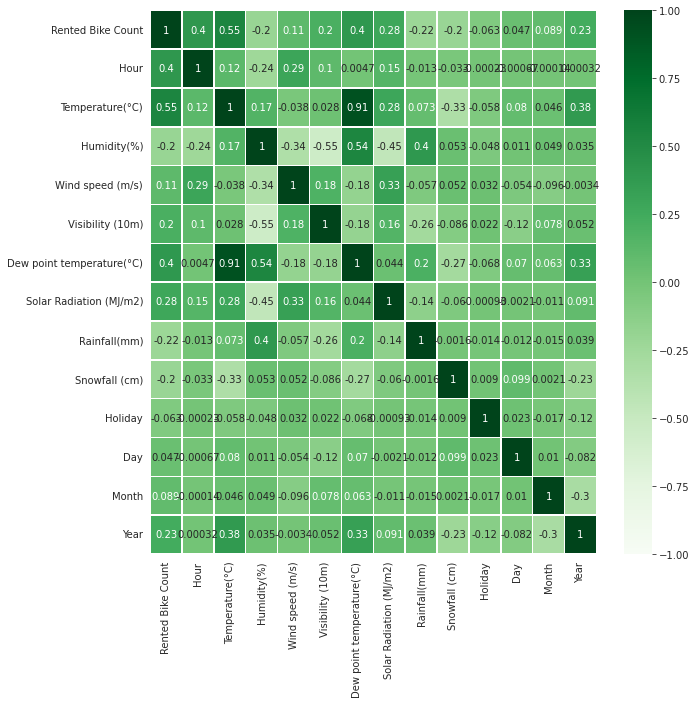

In [270]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'Greens')
plt.show()

* We can observe that Dew Point Temperature is highly correlated with Temperaturer. Hence, we will drop dew point temperature*
   

In [271]:
df.drop('Dew point temperature(°C)', inplace = True, axis = 1)


## Handling Categorical Features

In [272]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Weekday
0,254.0,0,-5.2,37,2.2,2000,0,0,0,Winter,0,12,1,2017,Thursday
1,204.0,1,-5.5,38,0.8,2000,0,0,0,Winter,0,12,1,2017,Thursday
2,173.0,2,-6.0,39,1.0,2000,0,0,0,Winter,0,12,1,2017,Thursday
3,107.0,3,-6.2,40,0.9,2000,0,0,0,Winter,0,12,1,2017,Thursday
4,78.0,4,-6.0,36,2.3,2000,0,0,0,Winter,0,12,1,2017,Thursday


In [273]:
df = pd.get_dummies(df, columns = ['Seasons', 'Year', 'Weekday'])

In [274]:
pd.set_option("display.max_columns", None)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254.0,0,-5.2,37,2.2,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,204.0,1,-5.5,38,0.8,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,173.0,2,-6.0,39,1.0,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
3,107.0,3,-6.2,40,0.9,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
4,78.0,4,-6.0,36,2.3,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0


## What is VIF?
A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

A rule of thumb for interpreting the variance inflation factor:
👉 1 = not correlated.
👉 Between 1 and 5 = moderately correlated.
👉 Greater than 5 = highly correlated.

In [275]:
# import vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Write a function for variance inflation factor(VIF)
def cal_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif.sort_values(by='VIF', ascending=False).reset_index(drop=True))

In [276]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Day', 'Month',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Year_2017', 'Year_2018', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [277]:
# Check VIF for each variable
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]
cal_vif(df[independent_variables])

,variables,VIF
0,Seasons_Spring,inf
1,Seasons_Summer,inf
2,Weekday_Tuesday,inf
3,Weekday_Thursday,inf
4,Weekday_Sunday,inf
5,Weekday_Saturday,inf
6,Weekday_Monday,inf
7,Weekday_Friday,inf
8,Year_2018,inf
9,Year_2017,inf


In [278]:
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count','Humidity(%)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Year_2017', 'Year_2018', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday']]
cal_vif(df[independent_variables])

,variables,VIF
0,Visibility (10m),5.505408
1,Wind speed (m/s),4.509455
2,Hour,4.014322
3,Month,3.855906
4,Day,3.463186
5,Temperature(°C),2.658246
6,Solar Radiation (MJ/m2),1.867197
7,Snowfall (cm),1.208296
8,Rainfall(mm),1.124683
9,Holiday,1.055428


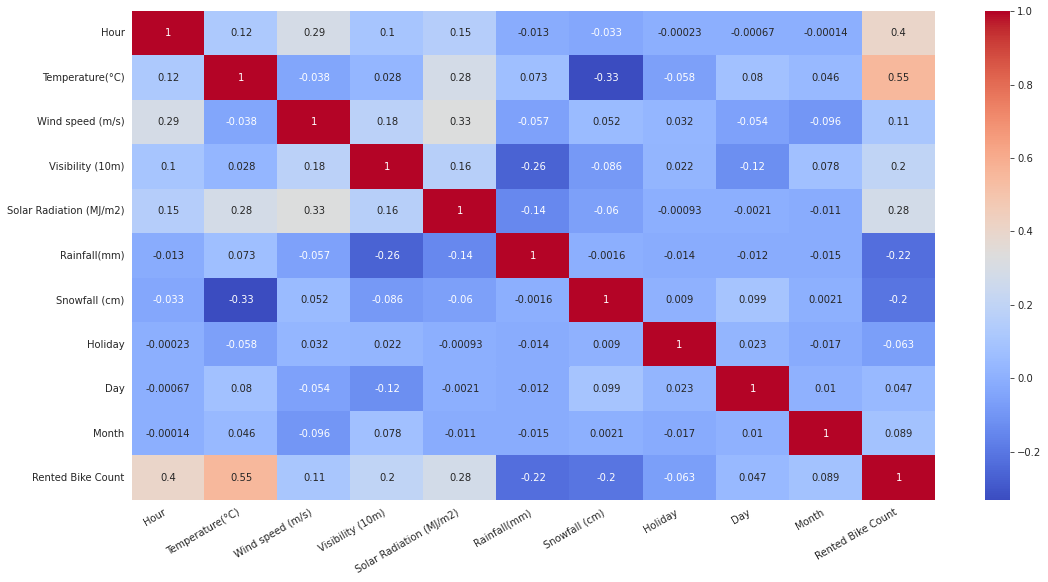

In [279]:
# Let's update data set for our model building
df = df[independent_variables + ['Rented Bike Count']]

# Checking corelation
plt.figure(figsize=(18,9))
plot = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()